In [155]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


# Data Preparation

In [ ]:
#import data
df = pd.read_csv("/Users/zuba818/Desktop/zstock/1398.csv")
df2 = pd.read_csv("/Users/zuba818/Desktop/zstock/1448.csv")
df3 = pd.read_csv("/Users/zuba818/Desktop/zstock/600036.csv")
df4 = pd.read_csv("/Users/zuba818/Desktop/zstock/600585.csv")
df5 = pd.read_csv("/Users/zuba818/Desktop/zstock/hsi.csv")
df6 = pd.read_csv("/Users/zuba818/Desktop/zstock/ssc.csv")

#we consider the closing price as predictor variable
stocks = pd.DataFrame({"stock_1398": df["Close"],
                       "stock_1448": df2["Close"],
                       "stock_600036": df3["Close"],
                       "stock_600585": df4["Close"],
                       "stock_hsi": df5["Close"],
                       "stock_ssc": df6["Close"]
})

#format datetime
stocks['Date'] = df.Date
stocks['Date'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stocks['Date']]

#quick data exploration
stocks.describe()

# Data Preparation

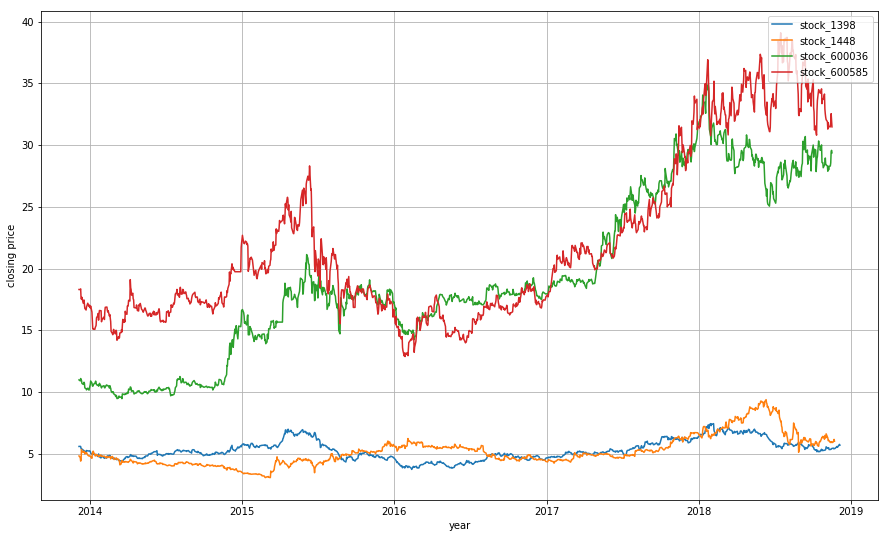

In [152]:
#Data Visualization 
#Since the HSI,SSC value is large, we better to plot the graph separately
plt.plot(stocks.Date, stocks.stock_1398,label = 'stock_1398')
plt.plot(stocks.Date, stocks.stock_1448,label = 'stock_1448')
plt.plot(stocks.Date, stocks.stock_600036,label = 'stock_600036')
plt.plot(stocks.Date, stocks.stock_600585,label = 'stock_600585')
plt.grid()
plt.xlabel("year")
plt.ylabel("closing price")
plt.legend(loc='upper right')

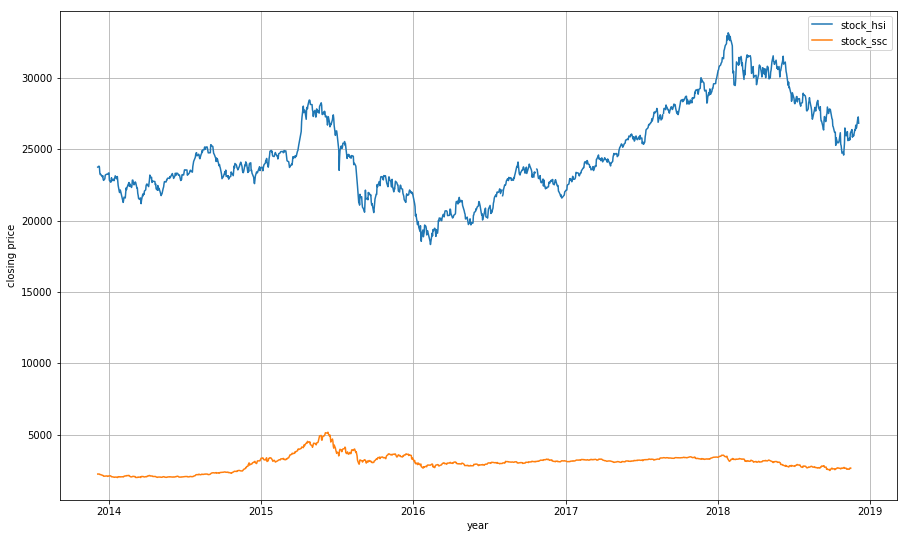

In [156]:
plt.plot(stocks.Date, stocks.stock_hsi,label = 'stock_hsi')
plt.plot(stocks.Date, stocks.stock_ssc,label = 'stock_ssc')
plt.grid()
plt.xlabel("year")
plt.ylabel("closing price")
plt.legend(loc='upper right')

In [ ]:
1For the dataset provided to you, find a suitable regression model and 
perform the tests for testing the significant of the model and the coefficients.
2Find confident intervals and prediction intervals for some suitable values of the predictor variables.
3Test for multicollinearity and autocorrelation for the residuals.

#Prediction interval is the confidence interval for an observation and includes the estimate of the error.

In [201]:
#using 399days for test only and we don't need to add constant.
a = stocks.stock_ssc[:400]
b = stocks.stock_hsi[:400]
c = stocks.stock_1398[:400]
d = stocks.stock_1448[:400]

In [202]:
multi = stocks.iloc[:,:4]
multi['stock_ssc'] = stocks.stock_ssc
multi = multi[:400]
multi.tail()

,stock_1398,stock_1448,stock_600036,stock_600585,stock_ssc
395,5.69,4.34,18.440001,20.510000,3992.110107
396,5.67,4.42,18.080000,20.350000,4017.675049
397,5.65,4.45,17.850000,19.930000,4026.044922
398,5.57,4.41,17.940001,20.870001,4123.922852
399,5.59,4.41,17.900000,20.270000,4070.907959


# The OLS(Ordinary least squares) Regression model.
# hsi vs 1398,1448,600036,600585,ssc (For multi)
# Multicollinearity

In [203]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

results = sm.OLS(b, multi).fit()
print(results.summary())
#[2] The condition number is large, 1.21e+04. This might indicate that there are strong multicollinearity or other numerical problems.

                            OLS Regression Results                            
Dep. Variable:              stock_hsi   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.161e+04
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:54:52   Log-Likelihood:                -3216.3
No. Observations:                 400   AIC:                             6443.
Df Residuals:                     395   BIC:                             6463.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
stock_1398    4341.4024    144.362     30.073   

In [209]:
predresults = results.predict()
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', predresults[:10])

Parameters:  stock_1398      4341.402418
stock_1448       674.060400
stock_600036    -111.693504
stock_600585     131.886953
stock_ssc         -1.085512
dtype: float64
Standard errors:  stock_1398      144.362227
stock_1448       75.112916
stock_600036     51.480419
stock_600585     40.311711
stock_ssc         0.192393
dtype: float64
Predicted values:  [26276.13996476 26238.35758803 25943.51189415 25334.53300189
 25567.8859615  25579.61268456 25160.57907274 25097.75984757
 25068.48323407 24749.58988912]


# C.I. & P.I. value format (show first 5 value via head())

In [208]:
predictions = results.get_prediction(multi)
predictions.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,26276.139965,63.621715,26151.060445,26401.219484,24784.447341,27767.832589
1,26238.357588,67.059764,26106.518906,26370.196270,24746.083003,27730.632173
2,25943.511894,71.986184,25801.987929,26085.035859,24450.350472,27436.673316
3,25334.533002,62.696775,25211.271902,25457.794102,23842.991753,26826.074251
4,25567.885962,78.014124,25414.511141,25721.260782,24073.554728,27062.217195


# OLS,Original Value,Confidence Interval results.

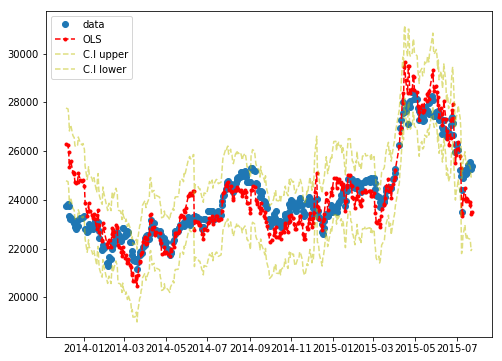

In [210]:
#This is the OLS Regression, hsi ~ the other stock.
#The red line is the OLS Regression.
#The blue dotted plot is the original hsi.
#The transparent yellow line is Confidence Interview.
#Since the graph look messy due to the data change dramatically, I will show the prediction intervals in value format.
prstd, iv_l, iv_u = wls_prediction_std(results)
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(stocks.Date[:400], b, 'o', label='data')
ax.plot(stocks.Date[:400], y_fitted, 'r--.',label='OLS')
ax.plot(stocks.Date[:400], iv_u, 'y--', label="C.I upper", alpha = 0.5)
ax.plot(stocks.Date[:400], iv_l, 'y--', label="C.I lower", alpha = 0.5)
ax.legend(loc='best')

# The OLS(Ordinary least squares) Regression model.
# 1398 vs 1448 (For non multi)
# Multicollinearity

In [211]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

results = sm.OLS(c, d).fit()
print(results.summary())
#[2] The condition number is large, 1.21e+04. This might indicate that there are strong multicollinearity or other numerical problems.

                            OLS Regression Results                            
Dep. Variable:             stock_1398   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 1.310e+04
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          3.12e-307
Time:                        01:56:44   Log-Likelihood:                -537.52
No. Observations:                 400   AIC:                             1077.
Df Residuals:                     399   BIC:                             1081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
stock_1448     1.2680      0.011    114.464      0.0

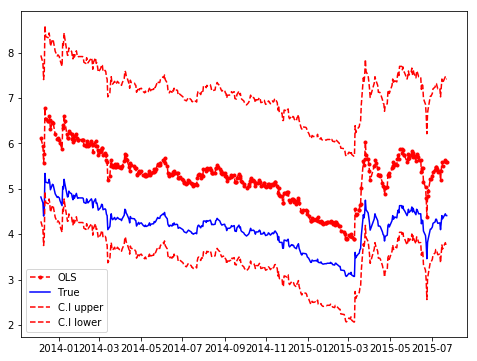

In [212]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(stocks.Date[:400], results.fittedvalues, 'r--.', label="OLS")
ax.plot(stocks.Date[:400], d, 'b-', label="True")
ax.plot(stocks.Date[:400], iv_u, 'r--', label="C.I upper")
ax.plot(stocks.Date[:400], iv_l, 'r--', label="C.I lower")
ax.legend(loc='best');

# C.I. & P.I. value format (show first 5 value via head())# 

In [216]:
predictions = results.get_prediction(d)
predictions.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.111930,0.053396,6.006957,6.216903,4.283024,7.940836
1,5.947085,0.051956,5.844944,6.049227,4.118339,7.775831
2,5.579355,0.048743,5.483529,5.675181,3.750951,7.407759
3,5.769560,0.050405,5.670468,5.868653,3.940982,7.598138
4,6.771308,0.059157,6.655010,6.887606,4.941717,8.600899


# Autocorrelation(Pearson, Kendall, Spearman)

In [27]:
stocks.corr()
#This correlation method using pearson correlation. the function from pandas default using
#(method='pearson', min_periods=1) and can change the method like ‘kendall’, ‘spearman’.

,stock_1398,stock_1448,stock_600036,stock_600585,stock_hsi,stock_ssc
stock_1398,1.000000,0.346058,0.650698,-0.143898,0.955487,0.882373
stock_1448,0.346058,1.000000,-0.207613,0.191091,0.465875,0.163637
stock_600036,0.650698,-0.207613,1.000000,-0.056344,0.536210,0.655269
stock_600585,-0.143898,0.191091,-0.056344,1.000000,-0.117274,-0.371559
stock_hsi,0.955487,0.465875,0.536210,-0.117274,1.000000,0.887829
stock_ssc,0.882373,0.163637,0.655269,-0.371559,0.887829,1.000000


In [53]:
stocks.corr(method='kendall')

,stock_1398,stock_1448,stock_600036,stock_600585,stock_hsi,stock_ssc
stock_1398,1.000000,0.320709,0.469146,-0.054537,0.827431,0.657201
stock_1448,0.320709,1.000000,-0.039302,0.130958,0.375260,0.137402
stock_600036,0.469146,-0.039302,1.000000,-0.076108,0.429710,0.464484
stock_600585,-0.054537,0.130958,-0.076108,1.000000,-0.063689,-0.219552
stock_hsi,0.827431,0.375260,0.429710,-0.063689,1.000000,0.684005
stock_ssc,0.657201,0.137402,0.464484,-0.219552,0.684005,1.000000


In [217]:
stocks.corr(method='spearman')

,stock_1398,stock_1448,stock_600036,stock_600585,stock_hsi,stock_ssc
stock_1398,1.000000,0.170065,0.574263,0.850296,0.948027,0.414191
stock_1448,0.170065,1.000000,0.684653,0.381337,0.285842,0.073504
stock_600036,0.574263,0.684653,1.000000,0.807743,0.692371,0.489311
stock_600585,0.850296,0.381337,0.807743,1.000000,0.894231,0.437039
stock_hsi,0.948027,0.285842,0.692371,0.894231,1.000000,0.345777
stock_ssc,0.414191,0.073504,0.489311,0.437039,0.345777,1.000000
